# Visualizing the prescription rate of pain-killers (opioids) in America, in relation to Income, Housing, & Food 


### IBM Data Science Professional Certificate - Capstone Project - 2020/01/15


## TABLE OF CONTENTS
* [ABSTRACT](#Abstract)
* [INTRODUCTION](#Introduction)
* [DATA](#Data)
* [METHODOLOGY](#Methodology)
* [RESULTS](#Results)
* [DISCUSSION](#Discussion)
* [CONCLUSION](#Conclusion)

## ABSTRACT <a name="Abstract"></a>

This project aims to visually explore the usage of pain-killer opioids in America. The intuition here is that those places in with the availability of a richer variety of food, particularly **plant based food** known to be of **low inflammation**, combined with a higher per-capita incomes & higher property values may be inversely related to the usage of prescription pain-killers(opioids). Data about the prescription rates, individual incomes & home values are gathered by county in each state, & using the geolocation data, heat maps are created to analyze & validate the intuition. 

## INTRODUCTION <a name="Introduction"></a>

In a recent significant congressional hearings on an unrelated political matter, the number of times the congressional representatives mentioned opioid crisis as an urgent problem that deserves a joint congressional action sounded more significant. The use of pain-killer opioids as a crisis particularly related to the prescription rates has been in the news for a few years now and it behooves one to ask why so many of us are in so much physical pain. 

**The aim of this project is to utilize location data to investigate and identify potential relationship(s) between the prevalent use of pain-killer opioid crisis, in relation to food, income & housing.** It’s assumed that the above essentials have some bearing on the opioid crisis, but a more thorough investigation to establish any causal links is outside the scope of this project. 

**Analysis:** This project relies on historical data from reputable sources to answer any questions and hence machine learning to identify the patterns, relationships and trends in historical data that are otherwise understood mostly only as anecdotal stories. The goal here is to show relationships & hence the use of clustering, a descriptive model. 

**Diagnosis:** Most problems in Data Science are classification problems. The analysis may help continue this line of investigation to perhaps predict how likely, a pain-killer will be prescribed based on access to better food, better income & better habitat.

**Prediction:** Predicting the probabilities or the likelihood of any of the direct or indirect variables like the increased access to better food, better paying jobs & better habitat is outside the scope of the project and therefore any speculation about the trends & future trajectories. 

**Prescription:** Prescriptive solutions to the pain-killer opioid usage are also outside the scope of this project.

## Data<a name="Data"></a> 

#### (1) Specify Data Requirements (2) Collect the Data (3) Understand the Data (4) Prepare the Data

**Data requirements:** To answer the questions about the use of **prescription pain-killer opioids**, the prescription rates along with geolocation data is required. The geolocation based prescription data helps join other relevant geolocation information such as availability & type of food, personal income & home prices to make any comparisons & potential associations. 

**Data collection:** Multiple data sources will be utilized to find the associated information. For this particular project, most recent historical data about prescription rates & per-capita personal incomes, property prices will suffice for data analysis. All the data is available as downloadable files. Foremost the project recommends & stipulates use of data from FourSquare, accessed via a REST API. 

Finally, all the data collected is staged in the <a href="https://datascience-capstone-project.s3.us-south.cloud-object-storage.appdomain.cloud">IBM public cloud object storage (COS), that’s also publicly available</a>.


<a href="https://www.hhs.gov/opioids/about-the-epidemic/opioid-crisis-statistics/index.html">United States Health & Human Services</a> provides information & <a href="https://www.cdc.gov/drugoverdose/data/index.html">navigation links</a> to the pain-killer opioid prescription data, available from the **Centers for Disease Control (CDC)**. However the file is not downloadable but the table can be scraped  from the Web page. 


Thanks to the **US Bureau of Economic Affairs(BEA)**, we can obtain <a href="https://www.bea.gov/data/income-saving/personal-income-county-metro-and-other-areas">personal income data by county, & by metropolitan areas</a>. Below is the map of income data by US counties for fiscal year spanning 2017-2018. 

Zillow is a popular & a reputable private sector organization that publishes the popular annual <a href="https://www.zillow.com/home-values/">median home values</a>. The data is made available for download & analysis.  The data that will be analysed as a part of this exercise is from the year 2017. 


**FourSquare offers an API** to search venues across the United States using longitude and latitude. The idea is to use the main longitude & latitude intersection for each of the 3000+ counties in United States to visualize a heat map displaying the availability of affordable plant based food (vegetarian), ethnic, standard chain restaurant food & fast food color coded in just 4 categories shown below as an example. 




|Green                | Orange                    |Red                   | Dark Red
|:--------------------|:--------------------------|:---------------------|:-----------------------
|Vegetarian Restaurant|Chinese Restaurant         |Fish & Chips Shop     | Burger Joint
|                     |Indian Restaurant          |American Restaurant   | Fast Food
|                     |Japanese Restaurant        |Seafood Restaurant    | Pizza Place
|                     |Mediteranian Restaurant    |Mexican Restaurant    | Wings Joint
|                     |Burrito Place              |Italian Restaurant    | Fried Chicken
|                     |Sandwich Place             |                      | Barbeque Joint


**Data understanding:** As a first step to conduct data science, data needs to be visualized & understood to  ensure that it is of appropriate quality & quantity. Descriptive statistics is a quick way to get the standard measures of mean, median and mode, variance & standard deviation. Almost all data analysis tools from spreadsheets to python offer functions to execute descriptive statistics. Box plots are a great way to visualize the descriptive statistics. Seaborn package can be utilized to visualize the data. Then of course data can be sorted into bins to create histograms.  There are at least 3 main data sets & a cross-reference dataset that will be utilized in this project.  Let’s visualize each of the datasets separately. 


**Import the python libraries**

In [4]:
import pandas as pd
import numpy as np
import scipy

# Print a hello world message
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


**Install & import packages for Data Visualizaton**

In [5]:
%%capture
! pip install seaborn

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Understand Data - CDC's Pain-Killer Prescription Rates by U.S. county

Quick visualization of pain-killer prescription rate table shows that data is gathered for for 2969 out of 3000+ counties, and missing data for about 14 reporting counties.  Box plot is a shows that the median **prescription rate for the counties is close to 75%, equivalent to stating that 3 in every 4 people** have been prescribed pain-killers. It looks like, there are a number of outliers who are prescribed above the maximum 150% in some counties 


In [540]:
# Define a DataFrame named prefixed with pkop to signify Prescription Rate of Opioids
#pkpDataFrame = pd.read_csv('https://datascience-capstone-project.s3.us-south.cloud-object-storage.appdomain.cloud/USCountyPainKillerPrescribingRates2017.csv')

# Create Pain-Killer-Prescription DataFrame (see pkp prrefix)
pkpDataFrame = pd.read_csv('USCountyPainKillerPrescribingRates2017.csv')


# Obtain the Descriptive Statistics of Prescription rates (Avg, Median, & Standard Deviation)
print(pkpDataFrame['PrescriptionRate'].describe())

# If prescription rate is more than 50 for every 100 people, classify the county as Painful (in pain)
pkpDataFrame.loc[pkpDataFrame['PrescriptionRate'] > 50, 'PainClass'] = 'Painful'
pkpDataFrame.loc[pkpDataFrame['PrescriptionRate'] <= 50, 'PainClass'] = 'Painfree'

pkpDataFrame.to_csv('USPainKillerPrescribingRate2017Above50Percent.csv')


# Print info about the data frame 
print("\n**********\nPain Killer Prescription DataFrame details:\n**********\n")
print(pkpDataFrame.info())


pkpDataFrame.head()

count    2955.000000
mean       67.995838
std        37.270946
min         0.000000
25%        44.600000
50%        64.800000
75%        88.250000
max       396.100000
Name: PrescriptionRate, dtype: float64

**********
Pain Killer Prescription DataFrame details:
**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 6 columns):
StateNumber         2955 non-null int64
StateCode           2955 non-null object
CountyCode          2955 non-null int64
County              2955 non-null object
PrescriptionRate    2955 non-null float64
PainClass           2955 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 138.6+ KB
None


,StateNumber,StateCode,CountyCode,County,PrescriptionRate,PainClass
0,1,AL,1001,AUTAUGA,106.6,Painful
1,1,AL,1003,BALDWIN,106.7,Painful
2,1,AL,1005,BARBOUR,90.7,Painful
3,1,AL,1007,BIBB,80.6,Painful
4,1,AL,1009,BLOUNT,48.9,Painfree


#### Let's visualize the Pain Killers Prescription Rates

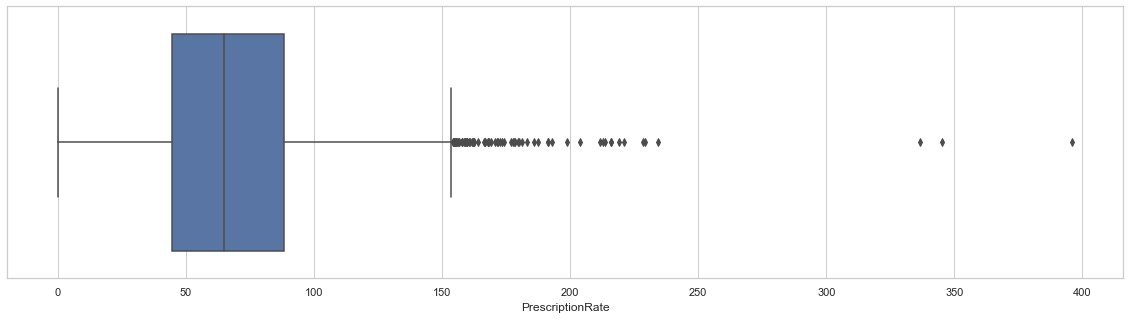

In [541]:
# Use pyplot/seaborn image use pyplot.figure to change the figure size. 
plt.figure(figsize=(20, 5))

sns.set(style='whitegrid')
sns.boxplot(x="PrescriptionRate", data=pkpDataFrame)


**Group Prescription Rate by State**

In [542]:
pkp1DataFrame = pkpDataFrame[['StateCode', 'PrescriptionRate']]

pkp1DataFrame = pkp1DataFrame.groupby(['StateCode'],as_index=False).mean()

pkp1DataFrame.set_index('StateCode', inplace=True)

pkp1DataFrame.head()

,PrescriptionRate
StateCode,
AK,47.841667
AL,99.552239
AR,98.872973
AZ,57.980000
CA,58.015789


Text(0.5, 1.0, 'State wise pain-killer prescription rates (2017)')

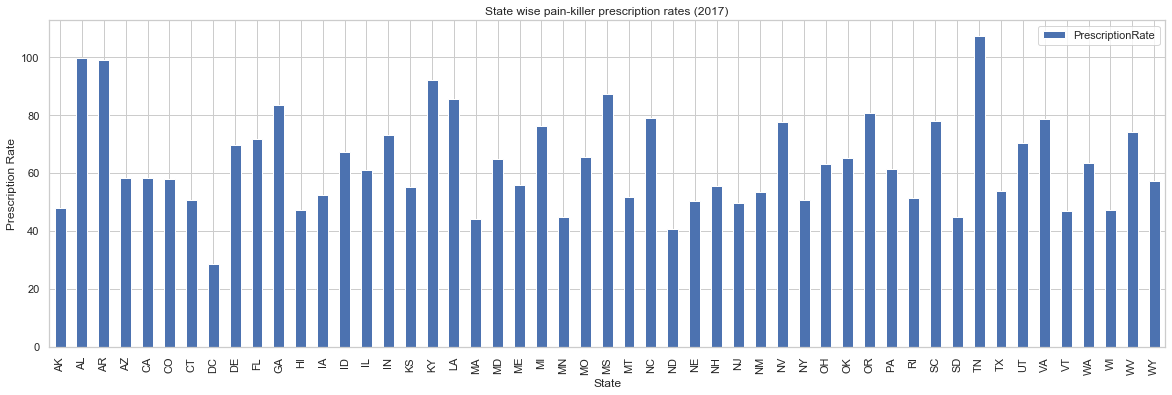

In [543]:
# Plot the data (barchart)
pkp1DataFrame.plot(kind='bar', width=0.5, figsize=(20, 6))
plt.xlabel('State') # add to x-label to the plot
plt.ylabel('Prescription Rate') # add y-label to the plot
plt.title('State wise pain-killer prescription rates (2017)') # add title to the plot

**It appears that more than 75% of states have pain killer prescription rates above 50%; use the threshold line to visualize**

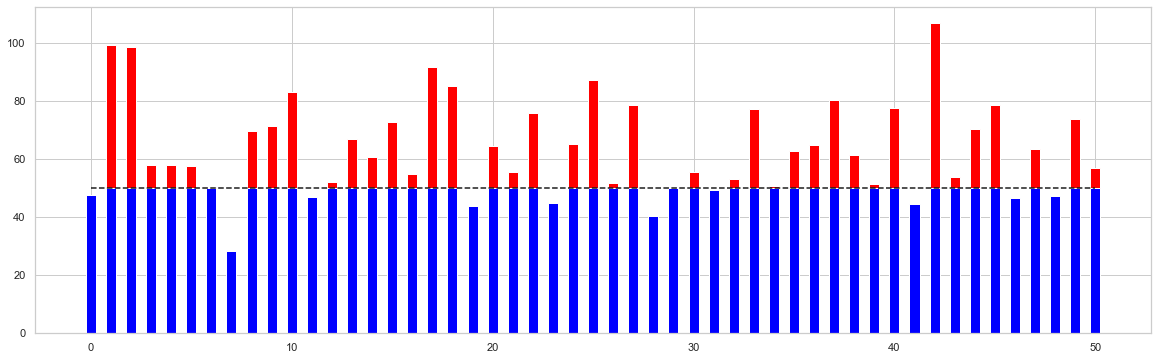

In [544]:
# input data for plotting
threshold = 50
y_values = np.array(pkp1DataFrame['PrescriptionRate'])

#print(x_values)

r = range(len(y_values))

# split it up
above_threshold = np.maximum(y_values - threshold, 0)
below_threshold = np.minimum(y_values, threshold)

# Plot using subplots to separate layers but determine the size of the plot
fig, ax = plt.subplots(figsize=(20, 6))
#ax.bar(r, below_threshold, 0.8, color="b")
#ax.bar(r, above_threshold, 0.8, color="r", bottom=below_threshold)
ax.bar(r, below_threshold, 0.5, color="blue")
ax.bar(r, above_threshold, 0.5, color="red", bottom=below_threshold)


# Use a horizontal line to indicate the threshold
ax.plot([0, 50], [threshold, threshold], "k--")

**The Outliers! New England States & Washington DC have the lowest Pain killer Prescription Rates** The southern states including Alabama, Arkansas, Georgia, Kentucky, Mississippi, Missouri, North Carolina, Oklohama, Tennessee, Texas & Virginia are interesting states with long whiskers and more than 50 prescriptions for every hundred people! 

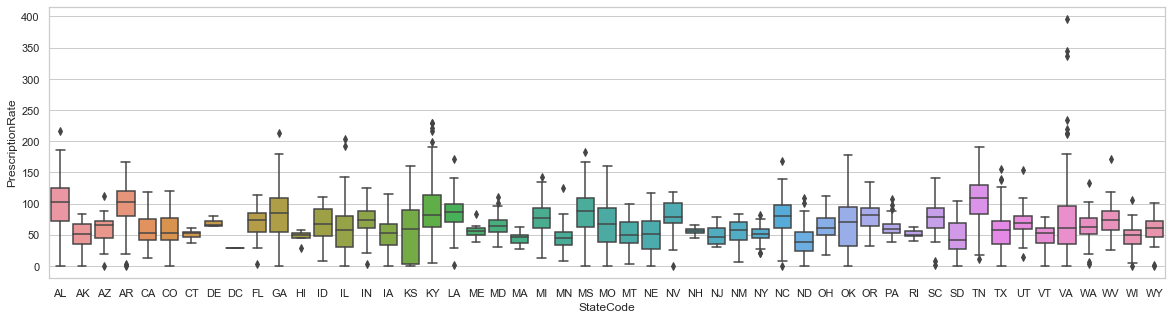

In [34]:
pkp2DataFrame = pkpDataFrame[['StateCode', 'PrescriptionRate']]

# Use pyplot/seaborn image use pyplot.figure to change the figure size. 
plt.figure(figsize=(20, 5))

sns.set(style='whitegrid')
sns.boxplot(x='StateCode', y='PrescriptionRate', data=pkp2DataFrame)


### Understand Data - US Bureau of Economic Affairs - Income Per Capita by U.S. county

In [35]:
# Create Income-PerCapita DataFrame (see ipc prrefix)
#ipcDataFrame = pd.read_csv("https://datascience-capstone-project.s3.us-south.cloud-object-storage.appdomain.cloud/USCountyIncomePerCapita2018.csv")

ipcDataFrame = pd.read_csv('USCountyIncomePerCapita2018.csv')
print(ipcDataFrame.count())
ipcDataFrame.head()

StateCode          3080
State              3080
CountyCode         3080
County             3080
IncomePerCapita    3080
dtype: int64


,StateCode,State,CountyCode,County,IncomePerCapita
0,AL,Alabama,1001,Autauga,41618
1,AL,Alabama,1003,Baldwin,45596
2,AL,Alabama,1005,Barbour,35199
3,AL,Alabama,1007,Bibb,30254
4,AL,Alabama,1009,Blount,34976


The descriptive statistics output shows us the following.

**Obtain Descriptive Statistical Information about Income Data** 

In [70]:
ipcDataFrame['IncomePC2018'].describe()

count      3080.000000
mean      44112.225000
std       12738.971561
min       18541.000000
25%       36557.750000
50%       41961.000000
75%       48748.500000
max      251728.000000
Name: IncomePC2018, dtype: float64

It seems that the average per-capita income in the U.S., during 2017-2018 is roughly over $44,000 for all 3,080 counties listed in the table for all 50 states. It is quickly apparent that this line of investigation may after all be fruitful to make qualitative statements, as one can see a few of the states with income below average, all have high pain-killer prescription rates, & the District of Columbia, the northeastern states all have significantly higher levels of income & visibly lower pain-killer prescription rates. 

In [51]:
ipc1DataFrame = ipcDataFrame[['StateCode', 'IncomePerCapita']]

ipc1DataFrame = ipc1DataFrame.groupby(['StateCode'],as_index=False).mean()

ipc1DataFrame.set_index('StateCode', inplace=True)

ipc1DataFrame.head()


,IncomePerCapita
StateCode,
AK,62513.413793
AL,37063.179104
AR,35725.506667
AZ,37879.266667
CA,56852.448276


Text(0.5, 1.0, 'State Wide Income for the year 2018')

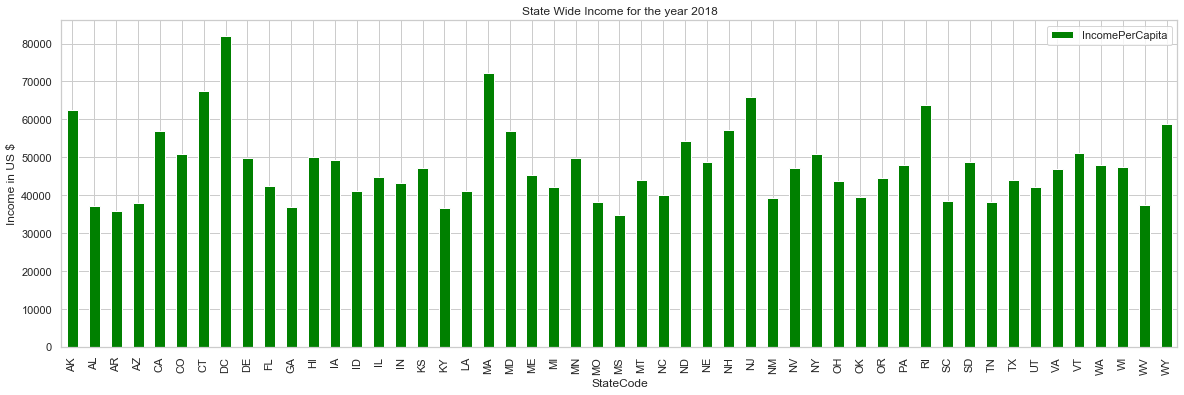

In [53]:
# Plot the data (barchart)
ipc1DataFrame.plot(kind='bar', figsize=(20, 6), color='green')

plt.xlabel('StateCode') # add to x-label to the plot
plt.ylabel('Income in US $') # add y-label to the plot
plt.title('State Wide Income for the year 2018') # add title to the plot


### Understand Data - Zillow Median Home Values by U.S. county

In [37]:
#mhvDataFrame = pd.read_csv('https://datascience-capstone-project.s3.us-south.cloud-object-storage.appdomain.cloud/USCountyMedianHomeValueAvgByZipCode.csv')
mhvDataFrame = pd.read_csv('USCountyMedianHomeValueAvgByZipCode.csv')
print(mhvDataFrame.count())
mhvDataFrame.head()

StateCode           1979
CountyName          1979
MedianHousePrice    1979
dtype: int64


,StateCode,CountyName,MedianHousePrice
0,AK,Anchorage,306691.67
1,AK,Fairbanks North Star,193461.38
2,AK,Juneau,349950.00
3,AK,Kenai Peninsula,238358.50
4,AK,Kodiak Island,332500.00


**Zillow median home values:** Quick descriptive statistics report of the home values table indicates that data for 1979 counties were recorded and average median home value is roughly $225K, in the year 2017.

In [38]:
mhvDataFrame['MedianHousePrice'].describe()

count    1.979000e+03
mean     2.251729e+05
std      1.658781e+05
min      5.000000e+04
25%      1.399000e+05
50%      1.855385e+05
75%      2.640467e+05
max      2.772500e+06
Name: MedianHousePrice, dtype: float64

**Consolidate data by State & Median House Price**

In [40]:
# Consolidate median Home Value by Price
mhv1DataFrame = mhvDataFrame[['StateCode', 'MedianHousePrice']]
#ipcbsDataFrame.head()

mhv1DataFrame = mhv1DataFrame.groupby(['StateCode'],as_index=False).mean()

mhv1DataFrame.set_index('StateCode', inplace=True)

mhv1DataFrame.head()

,MedianHousePrice
StateCode,
AK,297476.650000
AL,180574.334186
AR,143908.081220
AZ,247627.716923
CA,520442.412963


Text(0.5, 1.0, 'State Wide Median Home Values year 2017')

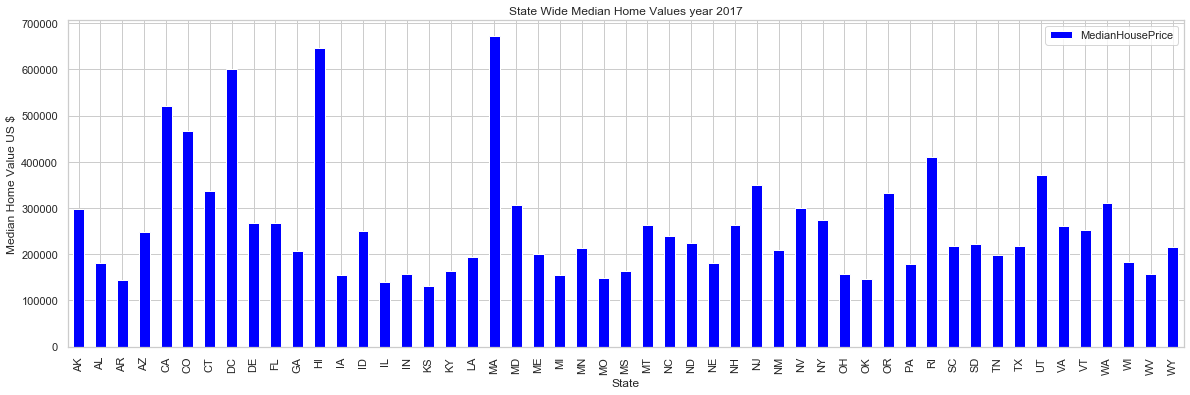

In [42]:
# plot the data
mhv1DataFrame.plot(kind='bar', figsize=(20, 6), color='blue')

plt.xlabel('State') # add to x-label to the plot
plt.ylabel('Median Home Value US $') # add y-label to the plot
plt.title('State Wide Median Home Values year 2017') # add title to the plot

**Also quickly visualize states that have higher than median home values**

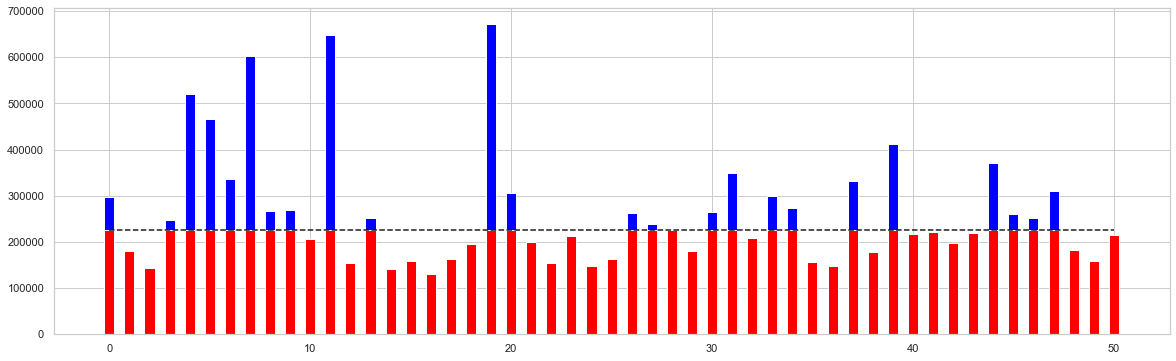

In [46]:

# input data for plotting
threshold = 225000.0
y_values = np.array(mhv1DataFrame['MedianHousePrice'])

#print(x_values)

r = range(len(y_values))

# split it up
above_threshold = np.maximum(y_values - threshold, 0)
below_threshold = np.minimum(y_values, threshold)

# Plot using subplots to separate layers but determine the size of the plot
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(r, below_threshold, 0.5, color="red")
ax.bar(r, above_threshold, 0.5, color="blue", bottom=below_threshold)


# Use a horizontal line to indicate the threshold
ax.plot([0, 50], [threshold, threshold], "k--")


## METHODOLOGY <a name="Methodology"></a>

It seems to be common knowledge that pain is physiological aspect of life can be attributed to lifestyle which in turn seems to largely depend on food & fiscal wellness. But that's an **ASSUMPTION**, and we'll make a number of other assumptions both qualitative & quantitative, and will take the help of **Machine Learning** to validate the assumptions without torturing the data, at the same time doing the necessary & due diligence to find out the **story hidden in the data**. 

DataScience problems are also broadly categorized into classification or regression problems. Here in this project, we will utilize machine learning in an attempt to classify each county in the United States as either Painful or Painfree based a chosen threshold of prescription rate; all the counties that have a **pain-killer prescription rate of 50% or below will be categorized as painfree counties** & the rest as painful. To estimate the prescription rate is a larger undertaking but given the common knowledge about pain, it seems logical to investigate if there are parameters that could predict a geographical region as either painful or painfree.

First we will have to ensure that all the baseline features are collected and the data is complete; for instance there are **over 3000 counties** that CDC has data about painkiller prescription rate; The bureau of economic affairs per capita income data on almost all of the counties, however, when it comes to **median home values** we have data about less than 2000 counties. So we have to estimate the median home values for the remaining counties. The reason why we **consider income & property values** is to catch the two important economic criteria for fiscal well being. What we mean is that those who have inherited wealth may have mostly capital gains income which is reinvested & may under report the income but factoring in the home values may help the data to be less skewed. We will first use **folium & choropleth maps** to visulize the datasets with relevance to geolocation. 

Secondly we will utilize an REST style Web services API to an external data source to retrieve geo location based information. **The department of helth & human services of which CDC is part of, also recommends a healthy serving of vegetables & fruits. Vegetarian food is known to lower inflammation**. So using **FourSquare API** we will then retrieve the **availabiliy of vegetarian food within 10 kilometer radius from the geographical center of a county(another assumption because some counties in the western states are too big & the geographical centers do not coincide with the business centers)**. 

Third and the perhaps the most important part of the project is where we will utilize a classical kernel method called **Support Vector Machine** to model the data and predict a county as either a painfree county or otherwise based on availability of vegetarian food, higher percapita income, & higher median home values, and evaluate the accuracy of the model using Training & Testing data sets.

### Let's first extrapolate the home values based on per-capita income using Linear Regression

**Inner join the 1892 Zillow Homevalues with income per capita**

In [58]:
df = pd.merge(mhvDataFrame, ipcDataFrame, left_on=['StateCode', 'CountyName'], right_on=['StateCode', 'County'], how='inner')

df[['StateCode', 'CountyName', 'MedianHousePrice', 'IncomePerCapita']].to_csv('HomeValuesSpreadsheet.csv')

print(df.count())

df.head()


StateCode           1892
CountyName          1892
MedianHousePrice    1892
State               1892
CountyCode          1892
County              1892
IncomePerCapita     1892
dtype: int64


,StateCode,CountyName,MedianHousePrice,State,CountyCode,County,IncomePerCapita
0,AL,Autauga,183163.25,Alabama,1001,Autauga,41618
1,AL,Baldwin,255185.71,Alabama,1003,Baldwin,45596
2,AL,Barbour,195000.00,Alabama,1005,Barbour,35199
3,AL,Blount,154450.00,Alabama,1009,Blount,34976
4,AL,Butler,129900.00,Alabama,1013,Butler,36450


### Predict Home Values using Income Data
**Split records into Training & Testing datasets (for linear regression) using SciKit Learn**

In [59]:
#######################################
# SPLIT THE TRAINING & TESTING DATASETS
#######################################

# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df[['IncomePerCapita']]
Y = df[['MedianHousePrice']]

# Split the dataset as testing & training
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X, Y, test_size=0.2, random_state=4)

# Print the shape of the resulting datasets (dataframes)
print("\nThe shape (rows, cols) of the training dataset is ", X_trn.shape)
print("\nThe shape (rows, cols) of the testing  dataset is ", X_tst.shape)



The shape (rows, cols) of the training dataset is  (1513, 1)

The shape (rows, cols) of the testing  dataset is  (379, 1)


**Visualize the TRAINING & TESTING data sets & see if there's a positive correlation between income & median home values**

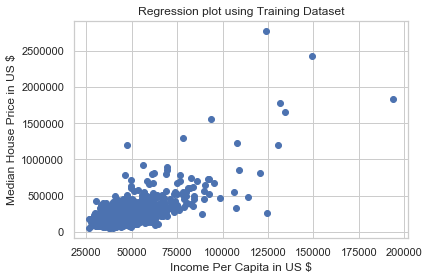

In [60]:
plt.scatter(X_trn, Y_trn, color='b')

plt.xlabel('Income Per Capita in US $')
plt.ylabel('Median House Price in US $')
plt.title('Regression plot using Training Dataset')
plt.show()


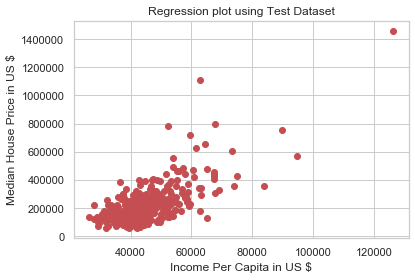

In [61]:
plt.scatter(X_tst, Y_tst, color='r')

plt.xlabel('Income Per Capita in US $')
plt.ylabel('Median House Price in US $')
plt.title('Regression plot using Test Dataset')
plt.show()

**Use Linear Regression model of (Sci-Kit Learn) estimate house values**


First few predicted house values : 
 [[217600.20972926]
 [143987.61651969]
 [268139.07869379]
 [293614.94747187]
 [142120.32448034]]


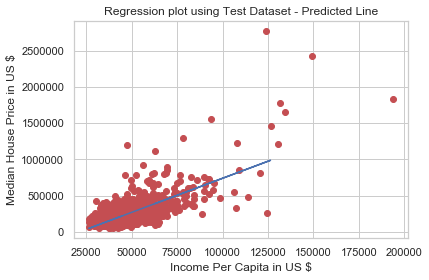

In [62]:
from sklearn import linear_model

# Instantiate Linear Regression Model
regr = linear_model.LinearRegression()

# Fit the LR model using the training dataset
regr.fit(X_trn, Y_trn)

Y_prd = regr.predict(X_tst)

print('\nFirst few predicted house values : \n', Y_prd[0:5])

plt.scatter(X, Y, color='r')

plt.xlabel('Income Per Capita in US $')
plt.ylabel('Median House Price in US $')
plt.title('Regression plot using Test Dataset - Predicted Line')
plt.plot(X_tst, Y_prd, '-b' )
plt.show()

### Utilize r2_score() of sklearn to compute the correlation coefficient

 $R^2$ = ( $ 1 - {\frac{Residual Errors Squared}{Mean Errors Squared}}$ )

 $R^2$ = $ 1 - {\frac{(Y_i - Y_f)^2 }{(Y_i - Y_m)^2}}$ 

 Residual Errors Squared is $ (Y_i - Y_f)^2 $ , 

 Mean Errors Squared     is $ (Y_i - Y_m)^2 $

**Not the best but Median Home value is definitely correlated to the Income, which accounts for 72% of variation**

In [63]:
from sklearn.metrics import r2_score
# Compute R square using r2_score of SciKit Learn r2_score(true, predicted)
print('R Square : %.2f' % r2_score(Y_tst, Y_prd))

R Square : 0.50


**Let's use the model to update the estimated median home values for all 3000+ counties** 

In [64]:
df = pd.merge(mhvDataFrame, ipcDataFrame, left_on=['StateCode', 'CountyName'], right_on=['StateCode', 'County'], how='right')
df.drop('CountyName', axis=1, inplace=True)
#print(df.count())
#df.head()

dfx = df.loc[df['MedianHousePrice'].isna()]

X = np.asanyarray(dfx[['IncomePerCapita']])
Y = regr.predict(X)

dfx['MedianHousePrice'] = Y
#dfx.head()

# Update the DataFrame by attaching the calculated Median House Prices Column
df.update(dfx)

df = df[['StateCode', 'State', 'CountyCode', 'County', 'IncomePerCapita', 'MedianHousePrice']]
print(df.count())

df.head()

StateCode           3080
State               3080
CountyCode          3080
County              3080
IncomePerCapita     3080
MedianHousePrice    3080
dtype: int64


C:\Users\rahdi\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,StateCode,State,CountyCode,County,IncomePerCapita,MedianHousePrice
0,AL,Alabama,1001.0,Autauga,41618.0,183163.25
1,AL,Alabama,1003.0,Baldwin,45596.0,255185.71
2,AL,Alabama,1005.0,Barbour,35199.0,195000.00
3,AL,Alabama,1009.0,Blount,34976.0,154450.00
4,AL,Alabama,1013.0,Butler,36450.0,129900.00



#### Crate a DataFrame using 'inner join' to match as many of the 3000 counties & create records that have 
**(1) INCOME** 
**(2) MEDIAN HOME VALUE**

In [65]:
df['CountyName'] = df['County'].str.upper() 
df.head()
# Inner Join the data frames, matching StateCode & CountyName
dfy = pd.merge(df, pkpDataFrame, left_on=['StateCode', 'CountyName'], right_on=['StateCode','County'], how='inner')
print(dfy.count())
dfy.head()

StateCode           2847
State               2847
CountyCode_x        2847
County_x            2847
IncomePerCapita     2847
MedianHousePrice    2847
CountyName          2847
StateNumber         2847
CountyCode_y        2847
County_y            2847
PrescriptionRate    2847
PainClass           2847
dtype: int64


,StateCode,State,CountyCode_x,County_x,IncomePerCapita,MedianHousePrice,CountyName,StateNumber,CountyCode_y,County_y,PrescriptionRate,PainClass
0,AL,Alabama,1001.0,Autauga,41618.0,183163.25,AUTAUGA,1,1001,AUTAUGA,106.6,Painful
1,AL,Alabama,1003.0,Baldwin,45596.0,255185.71,BALDWIN,1,1003,BALDWIN,106.7,Painful
2,AL,Alabama,1005.0,Barbour,35199.0,195000.00,BARBOUR,1,1005,BARBOUR,90.7,Painful
3,AL,Alabama,1009.0,Blount,34976.0,154450.00,BLOUNT,1,1009,BLOUNT,48.9,Painful
4,AL,Alabama,1013.0,Butler,36450.0,129900.00,BUTLER,1,1013,BUTLER,118.6,Painful


In [66]:
# Drop the unnecessary columns
dfy.drop(['CountyName', 'CountyCode_y', 'County_y'], axis=1, inplace=True )

# Rename the columns to tidy up the dataframe
dfy.rename(columns={"CountyCode_x":"CountyCode", "County_x":"County"},inplace=True)

# Reorder columns to shift StateNumber in front of StateCode
dfy = dfy[['StateNumber', 'StateCode', 'State', 'CountyCode', 'County', 'IncomePerCapita', 'MedianHousePrice', 'PrescriptionRate', 'PainClass']]

print(dfy.count())

print("AT THIS POINT WE HAVE A DATA FRAME FOR ",len(dfy)," COUNTIES IN UNITED STATES")

dfy.head()

StateNumber         2847
StateCode           2847
State               2847
CountyCode          2847
County              2847
IncomePerCapita     2847
MedianHousePrice    2847
PrescriptionRate    2847
PainClass           2847
dtype: int64
AT THIS POINT WE HAVE A DATA FRAME FOR  2847  COUNTIES IN UNITED STATES


,StateNumber,StateCode,State,CountyCode,County,IncomePerCapita,MedianHousePrice,PrescriptionRate,PainClass
0,1,AL,Alabama,1001.0,Autauga,41618.0,183163.25,106.6,Painful
1,1,AL,Alabama,1003.0,Baldwin,45596.0,255185.71,106.7,Painful
2,1,AL,Alabama,1005.0,Barbour,35199.0,195000.00,90.7,Painful
3,1,AL,Alabama,1009.0,Blount,34976.0,154450.00,48.9,Painful
4,1,AL,Alabama,1013.0,Butler,36450.0,129900.00,118.6,Painful


### Prepare Data - Table to cross-reference county codes & geography (longitude + latitude)

**Data preparation:** Data in the wild almost always contains missing or inconsistent data; there may be a need to join data using foreign keys as in this case & last but not least data almost always needs to be normalized to get a sense of proper scale when comparing two quantitative entities on scales of very different magnitudes. A cross reference dataset will be also utilized to cross-reference Fed. Information Processing Standards (FIPS) county code, to obtain geographic latitude and longitude information. The cross-reference data is provided by the U.S. Census Bureau as a tables called the U.S. Gazetteer Files, providing geographical details including the land area, latitude and longitude for each county.

**Attach Longitude & Latitude to each of the counties using US County Gazetteer to cross-reference geolocation names coordinates**

In [67]:
# Read the US Census Gazetteer file
#xrfDataFrame = pd.read_csv("https://datascience-capstone-project.s3.us-south.cloud-object-storage.appdomain.cloud/USCountyGazetteer2019.csv")
xrfDataFrame = pd.read_csv('USCountyGazetteer2019.csv')
print(xrfDataFrame.count())
xrfDataFrame.head()

StateCode        3220
CountyCode       3220
ANSICODE         3220
CountyName       3220
LandAreaSqMi     3220
WaterAreaSqMi    3220
Latitude         3220
Longitude        3220
dtype: int64


,StateCode,CountyCode,ANSICODE,CountyName,LandAreaSqMi,WaterAreaSqMi,Latitude,Longitude
0,AL,1001,161526,Autauga,594.444,9.926,32.532237,-86.646440
1,AL,1003,161527,Baldwin,1589.823,437.446,30.659218,-87.746067
2,AL,1005,161528,Barbour,885.008,19.507,31.870253,-85.405104
3,AL,1007,161529,Bibb,622.461,3.707,33.015893,-87.127148
4,AL,1009,161530,Blount,644.831,5.798,33.977358,-86.566440


In [254]:
# Descriptive statistics of all numeric values
xrfDataFrame.describe()

,CountyCode,ANSICODE,WaterAreaSqMi,Latitude,Longitude
count,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.628897e+05,82.616637,37.965388,-91.553504
std,16292.078954,5.174236e+05,471.226278,6.095978,14.149096
min,1001.000000,2.390100e+04,0.000000,17.948052,-164.188912
25%,19032.500000,4.849888e+05,2.704750,34.351125,-98.072444
50%,30024.000000,9.741585e+05,7.452500,38.215832,-89.943212
75%,46105.500000,1.419973e+06,23.252250,41.704658,-82.952177
max,72153.000000,2.516404e+06,10028.348000,69.449343,179.621188


In [68]:
print(dfy.count())
dfy.head()

StateNumber         2847
StateCode           2847
State               2847
CountyCode          2847
County              2847
IncomePerCapita     2847
MedianHousePrice    2847
PrescriptionRate    2847
PainClass           2847
dtype: int64


,StateNumber,StateCode,State,CountyCode,County,IncomePerCapita,MedianHousePrice,PrescriptionRate,PainClass
0,1,AL,Alabama,1001.0,Autauga,41618.0,183163.25,106.6,Painful
1,1,AL,Alabama,1003.0,Baldwin,45596.0,255185.71,106.7,Painful
2,1,AL,Alabama,1005.0,Barbour,35199.0,195000.00,90.7,Painful
3,1,AL,Alabama,1009.0,Blount,34976.0,154450.00,48.9,Painful
4,1,AL,Alabama,1013.0,Butler,36450.0,129900.00,118.6,Painful


In [69]:
# Initialize a new DataFrame
dfz = pd.DataFrame()

# Attach Latitude & Longitude 
dfz = pd.merge(dfy, xrfDataFrame, left_on=['CountyCode'], right_on=['CountyCode'], how='inner')

# Print the counts of the merged DataFrame & display the same
print(dfz.count())
dfz.head()

StateNumber         2847
StateCode_x         2847
State               2847
CountyCode          2847
County              2847
IncomePerCapita     2847
MedianHousePrice    2847
PrescriptionRate    2847
PainClass           2847
StateCode_y         2847
ANSICODE            2847
CountyName          2847
LandAreaSqMi        2847
WaterAreaSqMi       2847
Latitude            2847
Longitude           2847
dtype: int64


,StateNumber,StateCode_x,State,CountyCode,County,IncomePerCapita,MedianHousePrice,PrescriptionRate,PainClass,StateCode_y,ANSICODE,CountyName,LandAreaSqMi,WaterAreaSqMi,Latitude,Longitude
0,1,AL,Alabama,1001.0,Autauga,41618.0,183163.25,106.6,Painful,AL,161526,Autauga,594.444,9.926,32.532237,-86.646440
1,1,AL,Alabama,1003.0,Baldwin,45596.0,255185.71,106.7,Painful,AL,161527,Baldwin,1589.823,437.446,30.659218,-87.746067
2,1,AL,Alabama,1005.0,Barbour,35199.0,195000.00,90.7,Painful,AL,161528,Barbour,885.008,19.507,31.870253,-85.405104
3,1,AL,Alabama,1009.0,Blount,34976.0,154450.00,48.9,Painful,AL,161530,Blount,644.831,5.798,33.977358,-86.566440
4,1,AL,Alabama,1013.0,Butler,36450.0,129900.00,118.6,Painful,AL,161532,Butler,776.839,1.043,31.751667,-86.681969


### Use Cloropleth Maps to Visualize Income, Home Prices & Pain-Killer Prescription Rate (pain)

A Choropleth map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. 

Now, let's create our own `Choropleth` map of United States depicting Income, Home Prices & Pain Killer Prescription Rate. First Install the module xlrd

```
!conda install -c anaconda xlrd --yes
```

In [18]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

# All requested packages already installed.



### Install folium module for maps

In [70]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... 
  - anaconda/win-64::conda-4.8.1-py37_0
  - defaults/win-64::conda-4.8.1-py37_0done

## Package Plan ##

  environment location: C:\Users\rahdi\Apps\Anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         148 KB

The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2019.11.27-0 --> conda-forge::ca-certificates-2019.11.28-hecc5488_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                          anaconda --> conda-forge
  openssl                anaconda::openssl-1.1.1-he774522_0 --> conda-forge::openssl-1.1.1d-hfa6e2c

### Verify folium installation - create a map of United States with 37.09 & -95.71 as the center coordinates

In [ ]:
# First Create a Folium Map Object (fmo) of the USA; specify(longitude, latitude) in that order
# US Coordinates are 37.0902° N, 95.7129° W  (West of 0 degree longitude is prefixed negative)

fmoUSA = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# display world map
fmoUSA

### Use Choropleth map to visualize the pain-killer prescription rate. 

In [ ]:
# Now Create a Chloropleth map using the folium map object  

# create a numpy array of length 5 
threshold_scale = np.linspace(dfy['PrescriptionRate'].min(),
                              dfy['PrescriptionRate'].max(),
                              6, dtype=int)

threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # ensure last value in the list is GT max presc rate

# Reference the GEO JSON file (of USA Counties) located in the current directory
us_geojson = r'gz_2010_us_050_00_500k.json' # geojson file
#us_geojson = r'gz_2010_us_500_11_20m.json' # geojson file

# Generate choropleth map using the Income Grade
fmoUSA.choropleth(
    geo_data=us_geojson,
    data=dfy,
    columns=['County', 'PrescriptionRate'],
    key_on='feature.properties.NAME',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.0,
    legend_name='Prescription Rate across US Counties(per 100 people)',
    reset=True
)

# display map
fmoUSA

In [71]:
# Drop the unnecessary columns
dfz.drop(['StateCode_y', 'CountyName', 'LandAreaSqMi', 'WaterAreaSqMi', 'ANSICODE'], axis=1, inplace=True )

# Rename the columns to tidy up the dataframe
dfz.rename(columns={"StateCode_x":"StateCode"},inplace=True)

# Reorder columns to shift StateNumber in front of StateCode
dfz = dfz[['StateNumber', 'StateCode', 'State', 'CountyCode', 'County', 'Latitude','Longitude','IncomePerCapita', 'MedianHousePrice', 'PrescriptionRate', 'PainClass']]

# Print the counts of the merged DataFrame & display the same
print(dfz.count())
dfz.head()


StateNumber         2847
StateCode           2847
State               2847
CountyCode          2847
County              2847
Latitude            2847
Longitude           2847
IncomePerCapita     2847
MedianHousePrice    2847
PrescriptionRate    2847
PainClass           2847
dtype: int64


,StateNumber,StateCode,State,CountyCode,County,Latitude,Longitude,IncomePerCapita,MedianHousePrice,PrescriptionRate,PainClass
0,1,AL,Alabama,1001.0,Autauga,32.532237,-86.646440,41618.0,183163.25,106.6,Painful
1,1,AL,Alabama,1003.0,Baldwin,30.659218,-87.746067,45596.0,255185.71,106.7,Painful
2,1,AL,Alabama,1005.0,Barbour,31.870253,-85.405104,35199.0,195000.00,90.7,Painful
3,1,AL,Alabama,1009.0,Blount,33.977358,-86.566440,34976.0,154450.00,48.9,Painful
4,1,AL,Alabama,1013.0,Butler,31.751667,-86.681969,36450.0,129900.00,118.6,Painful


### Use Four Square API to retrieve the type of food (restaurants) available in each of the counties 

**Set the variables for Four Square API credentials** 

In [72]:
FoodCategory = '4d4b7105d754a06374d81259'

FastFood = '4bf58dd8d48988d16e941735'
Barbeque = '4bf58dd8d48988d1df931735'
American = '4bf58dd8d48988d14e941735'
FriedFood = '4d4ae6fc7a7b7dea34424761'
Burger = '4bf58dd8d48988d16c941735'
Pizza = '4bf58dd8d48988d1ca941735'
Wings = '4bf58dd8d48988d14c941735'
Steak = '4bf58dd8d48988d1cc941735'

Salad = '4bf58dd8d48988d1bd941735'
Vegetarian = '4bf58dd8d48988d1d3941735'

PotInflammatoryFood = [FastFood, Burger, Pizza, Wings, Steak]
NonInflammatoryFood = [Salad, Vegetarian]


In [73]:
import requests

CLIENT_ID = '*********' # your Foursquare ID
CLIENT_SECRET = '*********' # your Foursquare Secret
VERSION = '20200110' # Foursquare API version
RADIUS = 10000 # within 5000 meters (units) - FourSquare uses metric units
LIMIT = 10  # get Top 10 venues
#CATEGORY = FastFood+','+Barbeque+','+American+','+FriedFood+','+Burger+','+Pizza+','+Wings+','+Steak+','+Salad+','+Vegetarian
#CATEGORY = FoodCategory
CATEGORY = Vegetarian
INTENT = 'browse'

In [74]:
def getVenues(counties, states):

    # Create a counter to track the number of locations that did not have the desired category
    iNotFound = 0
    # Create an empty list to store all the searches that did not result in successful search
    venues_notfound =[]
    
    # Create an empty venue list that will be populated when this step completes execution. 
    venue_list=[]

    # Loop thru for each county & state (together) & retriieve the category groups & items (using FourSquare explore)
    for county, state in zip(counties, states):
        name = county+','+state
        #print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&radius={}&limit={}&near={}&categoryId={}&intent={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            RADIUS, 
            LIMIT,
            name,
            CATEGORY,
            INTENT)
            
        #print(url)
        # make the GET request
        try:
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
            #print(results)
            # return only relevant information for each nearby venue

            venue_list.append([(
                name,
                v['venue']['id'], 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'], 
                v['venue']['categories'][0]['id'],
                v['venue']['categories'][0]['name']) for v in results])

            # Create a DataFrame & return the same 
            fsqDataFrame = pd.DataFrame([item for i in venue_list for item in i])
            fsqDataFrame.columns = ['VenueLocation',
                  'VenueId', 
                  'VenueName', 
                  'VenueLongitude', 
                  'VenueLatitude', 
                  'VenueCategoryId', 
                  'VenueCategoryName']

        except:
            #print("Encountered an emtpy list of Restaurants!!! Moving on to next county")
            venues_notfound.append(['Location at ', name, ' returned an empty list!'])
            
            
    #return(venue_list)
    return(fsqDataFrame)

**CAUTION!** 

**This step retrieves at least 10 restaurants for every one of the US counties within 10 kilometer radius of it's geographical center** 

In [362]:
#--------- Take just 5 Records for Unit Testing -------------------------
#dff = dfz.head(5)
#dff.head()

# Execute the predefined function(invokes Four Square API) to get Venue Categories; read the results into a DataFrame
#restaurant_categories = getVenues(counties=dff['County'], states=dff['StateCode'])
#-------------------------------------------------------------------------


#------------------------------ CAUTION! ------------------------------------------
# Uncomment the line below to execute the complete search query for 3000 counties & save the file
#restaurant_categories = getVenues(counties=dfz['County'], states=dfz['StateCode'])
#restaurant_categories.to_csv('VegRestaurantsUSA.csv')
#------------------------------------------------------------------------------------


vegRestaurants = pd.read_csv('VegRestaurantsUSA.csv')
vegRestaurants.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

print ("The shape of the DataFrame(rows, cols) is", vegRestaurants.shape)
vegRestaurants.head()

The shape of the DataFrame(rows, cols) is (2400, 7)


,VenueLocation,VenueId,VenueName,VenueLongitude,VenueLatitude,VenueCategoryId,VenueCategoryName
0,"Autauga,AL",4b6fbcc9f964a52040fb2ce3,El Rey Burrito Lounge,32.352165,-86.291249,4bf58dd8d48988d1d3941735,Vegetarian / Vegan Restaurant
1,"Autauga,AL",4ef2911f8b81368cf8830701,Tofurkey,32.480875,-86.445736,4bf58dd8d48988d1d3941735,Vegetarian / Vegan Restaurant
2,"Autauga,AL",4ef285476da16847cd3eff41,Veggies-on-a-stick,32.480831,-86.445726,4bf58dd8d48988d1d3941735,Vegetarian / Vegan Restaurant
3,"Autauga,AL",4ef2789477c810388d068250,Cow A Bun Go,32.480869,-86.445395,4bf58dd8d48988d1d3941735,Vegetarian / Vegan Restaurant
4,"Autauga,AL",4ed8e0699a5286d91d7079b3,Rawlife Foods,32.363412,-86.285223,4bf58dd8d48988d1d3941735,Vegetarian / Vegan Restaurant


**Check to ensure that the FourSquare API has reliably returned only the selected/desired categories** 

In [364]:
print('There are {} unique categories in the dataset\n'.format(len(vegRestaurants['VenueCategoryName'].unique())))
print(vegRestaurants['VenueCategoryName'].unique())

There are 60 unique categories in the dataset

['Vegetarian / Vegan Restaurant' 'Grocery Store' 'Sushi Restaurant'
 'Supermarket' 'Thai Restaurant' 'Sandwich Place' 'Café'
 'Indian Restaurant' 'Burger Joint' 'Mexican Restaurant'
 'Asian Restaurant' 'Vietnamese Restaurant' 'Salad Place' 'Pizza Place'
 'Italian Restaurant' 'Bar' 'American Restaurant' 'Pub'
 'Mediterranean Restaurant' 'Brewery' 'Diner' 'Bakery' 'Soup Place'
 'Moroccan Restaurant' 'Fast Food Restaurant' 'Farmers Market'
 'Organic Grocery' 'Deli / Bodega' 'New American Restaurant'
 'Chinese Restaurant' 'Restaurant' 'Burrito Place'
 'Middle Eastern Restaurant' 'Breakfast Spot' 'Tea Room' 'Noodle House'
 'Music Venue' 'Taco Place' 'Yoga Studio' 'Food Court' 'Buffet'
 'Health Food Store' 'Gourmet Shop' 'Coffee Shop' 'Dumpling Restaurant'
 'Japanese Restaurant' 'Gastropub' 'Juice Bar' 'Cajun / Creole Restaurant'
 'Market' 'Belgian Restaurant' 'Falafel Restaurant' 'Winery'
 'Afghan Restaurant' 'BBQ Joint' 'Farm' 'Bistro' 'Gluten

**Clean the data frame to compensate for the bug(s) in FourSquareAPI (drop rows that are not Vegetarian Restaurants** 

In [369]:
print("Total number of venues returned by the API Call: \n------------------------------------------------\n")
print(vegRestaurants.count())
vegRestaurantsReal = vegRestaurants[vegRestaurants.VenueCategoryId == Vegetarian]
print("\n Dropped restaurant categories that are not Vegetarian (API Bugs?)\n\n")


# Print Total number of venues returned
print("Correct number of venues returned by the API Call: \n--------------------------------------------------\n")
print(vegRestaurantsReal.count())


Total number of venues returned by the API Call: 
------------------------------------------------

VenueLocation        2400
VenueId              2400
VenueName            2400
VenueLongitude       2400
VenueLatitude        2400
VenueCategoryId      2400
VenueCategoryName    2400
dtype: int64

 Dropped restaurant categories that are not Vegetarian (API Bugs?)


Correct number of venues returned by the API Call: 
--------------------------------------------------

VenueLocation        2108
VenueId              2108
VenueName            2108
VenueLongitude       2108
VenueLatitude        2108
VenueCategoryId      2108
VenueCategoryName    2108
dtype: int64


**Group the Restaurants by County (at most each county will have 10 restaurants & 0 at the least)**

In [377]:
# Consolidate Venue Counts, grouped by Venue Location
venue_counts = vegRestaurantsReal.groupby('VenueLocation').count().reset_index()

# Drop the counts for columns
venue_counts.drop(columns=['VenueId', 'VenueName', 'VenueLongitude', 'VenueLatitude', 'VenueCategoryName'], 
                  axis=1, inplace=True)

# Rename the VenueCategoryId as simply VenueCount
venue_counts.rename(columns={'VenueCategoryId':'VenueCount'}, inplace=True)

print("Consolidated venue location, the shape (rows, columns) of Venue Counts DataFrame is: ", venue_counts.shape)
venue_counts.head()

Consolidated venue location, the shape (rows, columns) of Venue Counts DataFrame is:  (512, 2)


,VenueLocation,VenueCount
0,"Ada,ID",3
1,"Adair,MO",1
2,"Adams,IL",1
3,"Adams,MS",5
4,"Alachua,FL",9


One of the most **challenging aspects of Data Science is the ability to gather & wrangle the data**. At this point in the exercise it became clear that the API has not returned for all 3000 venues due to reasons not yet known.  But we have data on Veg Restaurants ranging from 1 to 10 for the counties returned & we'll proceed with the exercise.  

**Refactor the column Venue Location to later (left)join this subset to the superset (DataFrame)**

In [399]:
venues_refactored = venue_counts['VenueLocation'].str.split(",", n = 1, expand=True) 
print(venues_refactored.shape)
venues_refactored.rename(columns={0:'CountyName', 1:'StateCode'}, inplace=True)
venues_refactored.head()

(512, 2)


,CountyName,StateCode
0,Ada,ID
1,Adair,MO
2,Adams,IL
3,Adams,MS
4,Alachua,FL


In [400]:
# Create an new empty DataFrame called dfx (track the variables) 
dfx = pd.DataFrame

# Join the dataframes on default index
dfy = dfx.join(venue_counts, venues_refactored)

#print("Shape (rows, cols) of the venue counts DataFrame is :", venue_counts.shape)
dfy.head(20)


,VenueLocation,VenueCount,CountyName,StateCode
0,"Ada,ID",3,Ada,ID
1,"Adair,MO",1,Adair,MO
2,"Adams,IL",1,Adams,IL
3,"Adams,MS",5,Adams,MS
4,"Alachua,FL",9,Alachua,FL
5,"Alameda,CA",7,Alameda,CA
6,"Allegany,MD",1,Allegany,MD
7,"Allen,IN",2,Allen,IN
8,"Allen,KY",2,Allen,KY
9,"Alpena,MI",1,Alpena,MI


In [387]:
dfz.head()

,StateNumber,StateCode,State,CountyCode,County,Latitude,Longitude,IncomePerCapita,MedianHousePrice,PrescriptionRate,PainClass
0,1,AL,Alabama,1001.0,Autauga,32.532237,-86.646440,41618.0,183163.25,106.6,Painful
1,1,AL,Alabama,1003.0,Baldwin,30.659218,-87.746067,45596.0,255185.71,106.7,Painful
2,1,AL,Alabama,1005.0,Barbour,31.870253,-85.405104,35199.0,195000.00,90.7,Painful
3,1,AL,Alabama,1009.0,Blount,33.977358,-86.566440,34976.0,154450.00,48.9,Painful
4,1,AL,Alabama,1013.0,Butler,31.751667,-86.681969,36450.0,129900.00,118.6,Painful


In [412]:
df = pd.merge(dfz, dfy, left_on=['StateCode', 'County'], right_on=['StateCode', 'CountyName'], how='right')
df.drop(columns=['VenueLocation', 'CountyName'], inplace=True)
df.rename(columns={'VenueCount':'VegRestaurants'}, inplace=True)
df['VegRestaurants'].fillna(0, inplace=True)
df[['State', 'County', 'IncomePerCapita', 'MedianHousePrice', 'VegRestaurants', 'PrescriptionRate', 'PainClass']].to_csv('USPainKillerPrescriptionRateDataSet.csv')
df[['State', 'County', 'IncomePerCapita', 'MedianHousePrice', 'VegRestaurants', 'PrescriptionRate', 'PainClass']].head(20)


,State,County,IncomePerCapita,MedianHousePrice,VegRestaurants,PrescriptionRate,PainClass
0,Alabama,Autauga,41618.0,183163.25,5,106.6,Painful
1,Alabama,Baldwin,45596.0,255185.71,5,106.7,Painful
2,Alabama,Clay,33530.0,229000.00,6,112.2,Painful
3,Alabama,Colbert,38378.0,142616.67,1,186.0,Painful
4,Alabama,Elmore,42269.0,179305.40,6,109.4,Painful
5,Alabama,Etowah,36918.0,149900.00,1,130.5,Painful
6,Alabama,Jefferson,54730.0,203667.77,6,104.2,Painful
7,Alabama,Lauderdale,37151.0,201560.00,1,104.7,Painful
8,Alabama,Lawrence,34125.0,129900.00,1,98.8,Painful
9,Alabama,Lee,38036.0,239078.57,5,58.5,Painful


Visualize the **histogram** of features to get a rough idea (notice that Prescription rate resembles income)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F63FF433C8>,
      dtype=object)

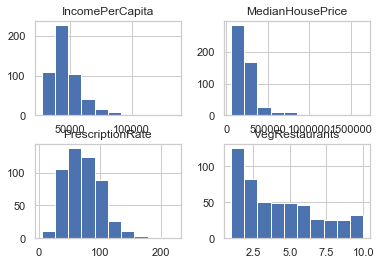

In [520]:
df[['IncomePerCapita', 'MedianHousePrice', 'VegRestaurants', 'PrescriptionRate']].hist()

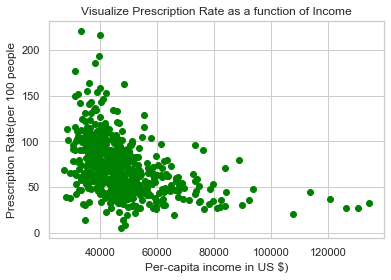

In [457]:
plt.scatter(df.IncomePerCapita, df.PrescriptionRate, color='green')
plt.xlabel('Per-capita income in US $)')
plt.ylabel('Prescription Rate(per 100 people')
plt.title("Visualize Prescription Rate as a function of Income")
plt.show()

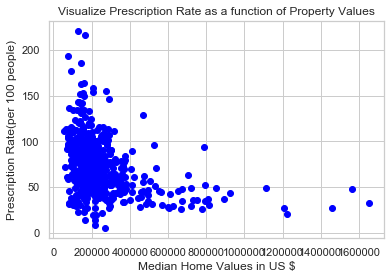

In [458]:
plt.scatter(df.MedianHousePrice, df.PrescriptionRate, color='blue')
plt.xlabel('Median Home Values in US $')
plt.ylabel('Prescription Rate(per 100 people)')
plt.title("Visualize Prescription Rate as a function of Property Values")
plt.show()

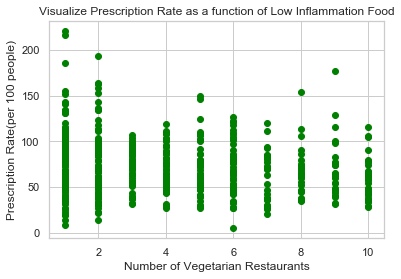

In [509]:
plt.scatter(df.VegRestaurants,df.PrescriptionRate, color='green')
plt.xlabel('Number of Vegetarian Restaurants')
plt.ylabel('Prescription Rate(per 100 people)')
plt.title("Visualize Prescription Rate as a function of Low Inflammation Food")
plt.show()

**Select the features to build a classifier model**

In [499]:
#######################################
# FEATURE SELECTION (X, Y)
#######################################

# Select the (1) Income, (2) Median House Value, (3) Number of Veg Resturants as independent array of variables X
#X = df[['IncomePerCapita','MedianHousePrice','VegRestaurants']]
X = df[['IncomePerCapita','MedianHousePrice', 'VegRestaurants']]
X.head()

,IncomePerCapita,MedianHousePrice,VegRestaurants
0,41618,183163.25,5
1,45596,255185.71,5
2,33530,229000.00,6
3,38378,142616.67,1
4,42269,179305.40,6


In [500]:
# Select PainClass as either Painfull or Painfree (binary classification as predictor variable)
Y = df['PainClass']
Y.head()

0    Painful
1    Painful
2    Painful
3    Painful
4    Painful
Name: PainClass, dtype: object

**Split the data into training & testing datasets 80/20 split**

In [501]:
#######################################
# SPLIT THE TRAINING & TESTING DATASETS
#######################################

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split the dataset as testing & training
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X, Y, test_size=0.2, random_state=4)

# Print the shape of the resulting datasets (dataframes)
print("\nThe shape (rows, cols) of the training dataset is ", X_trn.shape)
print("\nThe shape (rows, cols) of the testing  dataset is ", X_tst.shape)

print("\n The features selected to create model are : \n", X_trn.head(3))
print("\n The dependent variable used to fit the model : \n", Y_trn.head(3))


The shape (rows, cols) of the training dataset is  (409, 3)

The shape (rows, cols) of the testing  dataset is  (103, 3)

 The features selected to create model are : 
      IncomePerCapita  MedianHousePrice  VegRestaurants
436            40036         140333.33               1
129            36997         186304.25               3
375            52984         264590.00              10

 The dependent variable used to fit the model : 
 436     Painful
129     Painful
375    PainFree
Name: PainClass, dtype: object


## RESULTS <a name="Results"></a>

**Model building** -  Guideline question: How can I best model the data, visualize the data to steer my investigation. 

**Model evaluation** - Guideline question: What kind of model is appropriate to analyze the data & does the model answer the question
Lorem ipsum dolor sit amet, consectetuer adipiscing elit, sed diam nonummy nibh euismod tincidunt ut laoreet dolore magna aliquam erat volutpat.

**Model deployment** - Guideline question: Can the model be put into practice. 

**Incorporating feedback** - Guideline question: Can we get constructive feedback to answer the question. 


Using the Support Vector Machine (SVM) model and the test data (independent variables) that the model has not seen, I made predictions & compared with actual class; the model was able to predict a Painful county with 72% accuracy; however the model was unable to make any predictions about Painfree counties based on the features. As a sanity check, I then recreated the model with just 2 features, income and habitat and retested the model and surprisingly it performed the same suggesting that food may not after all factor into the high rate of prescription pain-killers, not to say much about pain & inflammation itself.

The exercise was somewhat surprising and intriguing at the same time. If indeed the availability of food does not play a role in inflammation, chances are that the prescription of painkillers are not really for treating inflammation, perhaps even abused as recreational drugs or anti-depressants. Although the results are inadequate to make a conclusion, the methods are sound and it implores us to revisit this problem, which I definitely would like to. 

#### Support Vector Machines (SVM)
Utilize Support Vector Machines (SVM), a **kernel method** to see if there's an **optimal boundary** between the sets of datapoints that collectively describe pain as a combination of income, property value, & non-inflammatory food(vegetarian)

In [502]:
# Import Support Vector Machine from sklearn
from sklearn import svm

# Instantiate a classifier & use the default Radial Basis Function (RBF), a kernel method
modelSVM = svm.SVC(kernel='rbf', gamma='auto')

# Print the characteristics of the classifier (modelSVM) model
print("\n\n The characteristics of instantiated model are :", modelSVM)

# Fit the Training data to the classifier model (Y_trn) specifies the number of classes
modelSVM.fit(X_trn, Y_trn)

print( "\n\n Classes used by the classifier are : ", modelSVM.classes_ )

# Make the prediction
Y_svm = modelSVM.predict(X_tst)
print ("\n\n Created a prediction set using the Support Vector Machine classifier \n")



 The characteristics of instantiated model are : SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


 Classes used by the classifier are :  ['PainFree' 'Painful']


 Created a prediction set using the Support Vector Machine classifier 



In [503]:
from sklearn import metrics
from sklearn.metrics import classification_report


# Compute Accuracy
print("\n\n Accuracy of the Support Vector Machine(SVM) model is: ", 
        metrics.accuracy_score(Y_tst, Y_svm))



 Accuracy of the Support Vector Machine(SVM) model is:  0.7184466019417476


In [504]:
######################################################
### DEFINE A FUNCTION TO PLOT THE CONFUSION MATRIX ###
######################################################

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[74  0]
 [ 0  0]]


 The Accuracy score of the model is (TP + FN)/80 :  0.925


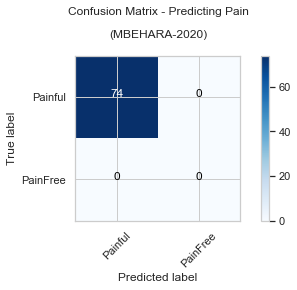

In [528]:
# Import Confusion Matrix & Classification Report from Sci-Kit Learn & Iteration tools
from sklearn.metrics import confusion_matrix
import itertools

###########################################
### COMPUTE & PLOT THE CONFUSION MATRIX ###
###########################################

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_tst, Y_svm, labels=['Painful','Painfree'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['Painful', 'PainFree'],
                      normalize= False,  title='Confusion Matrix - Predicting Pain\n\n(MBEHARA-2020)\n')

print("\n\n The Accuracy score of the model is (TP + FN)/80 : ", (cnf_matrix[0][0]+cnf_matrix[1][1])/80)

In [506]:
print("\n\n Classification Report of the Support Vector Machine (SVM) \n----------------------------------------------------------\n ", 
       classification_report(Y_tst, Y_svm))



 Classification Report of the Support Vector Machine (SVM) 
----------------------------------------------------------
                precision    recall  f1-score   support

    PainFree       0.00      0.00      0.00        29
     Painful       0.72      1.00      0.84        74

    accuracy                           0.72       103
   macro avg       0.36      0.50      0.42       103
weighted avg       0.52      0.72      0.60       103



C:\Users\rahdi\Apps\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [527]:
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import jaccard_similarity_score
print("\n Jaccard Similarity Score - Support Vector Machine (SVM)  : ", jaccard_similarity_score(Y_tst, Y_svm))



 Jaccard Similarity Score - Support Vector Machine (SVM)  :  0.7184466019417476


C:\Users\rahdi\Apps\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


## DISCUSSION <a name="Discussion"></a>

The ability to digitally record data and the ubiquity of the same, combined with the availability of very sophisticated open source software allows more of us to apply complex scientific methods to investigate a great variety of real world issues. Before diving in and applying analytical techniques to data there is a tremendous amount of legwork to get all the data right in the desired format ready for analysis. This effort is referred to in our business as data wrangling. While it was surprising to learn that income and house values alone can classify if the pain killer prescription rate is above or below 50%, it also invites one to look closely and carefully at some of the assumptions made and how data is normalized. The Four Square API returned 2400 vegetarian restaurants, but also returned other types of restaurants, with an over all accuracy of 88%. The API did not retrieve all the restaurants, perhaps due to overloading or perhaps due to unavailability of data for some counties. This alone requires to return to this study and perhaps pick just one state, a state that is more interesting to investigate the problem. The state of Virginia seems to be one of the more interesting states that has long whiskers indicating the long range of minimum and maximum values and many outliers.   

## CONCLUSION <a name="Conclusion"></a>

This has been a useful exercise that served as a warmup for a more rigorous work. We did validate that-

(1) Economically depressed counties have a high prescription rate of pain-killers (above the threshold of 50 prescriptions per 100 persons), and it’s predictable

(2) Areas that have 6 or more vegetarian restaurants, all have a prescription rate of below 100%, and 5 or less indicated the opposite

(3) Perhaps the prescription of pain-killers after all have not much to do with treating pain itself

This case is far from settled and the next step for us is to gather more data, and investigate a more interesting state such as Virginia to find out more about the factors that may be contributing to high prescription rate of pain-killers.

# ***